# 🎥 Netflix : Data Exploration and Visualisation 📊

### **Business Problem**
Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries.

### **About Netflix**

Netflix is one of the most popular media and video streaming platforms. They have over 10,000 movies or TV shows available on their platform. As of mid-2021, they have over 222M subscribers globally.

This tabular dataset consists of listings of all the movies and TV shows available on Netflix, along with details such as:

- **Show_id**: Unique ID for every Movie / TV Show  
- **Type**: Identifier - A Movie or TV Show  
- **Title**: Title of the Movie / TV Show  
- **Director**: Director of the Movie  
- **Cast**: Actors involved in the movie/show  
- **Country**: Country where the movie/show was produced  
- **Date_added**: Date it was added on Netflix  
- **Release_year**: Actual Release year of the movie/show  
- **Rating**: TV Rating of the movie/show  
- **Duration**: Total Duration - in minutes or number of seasons  
- **Listed_in**: Genre  
- **Description**: The summary description  




## **1. Defining Problem Statement and Analyzing Basic Metrics**

#### **Problem Statement**
Netflix, as one of the leading video streaming platforms, aims to:

1. **Determine which types of shows/movies to produce** by analyzing existing content and user preferences.  
2. **Identify growth opportunities in different countries** based on regional content trends.  
3. **Understand historical trends and the performance** of specific genres, directors, and actors.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
!gdown 1O6_3C8BGMX45Fk5Zq6rlU-NwwpRe-tjJ

Downloading...
From: https://drive.google.com/uc?id=1O6_3C8BGMX45Fk5Zq6rlU-NwwpRe-tjJ
To: /content/netflix_dataset.csv
100% 3.40M/3.40M [00:00<00:00, 72.1MB/s]


In [6]:
df = pd.read_csv('netflix_dataset.csv', on_bad_lines='warn')

In [7]:
print("First 5 rows of the dataset:\n")
df.head()

First 5 rows of the dataset:



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### **Basic Metrics**

Basic metrics include:

- **Number of records and attributes** in the dataset.
- **Data types** of columns.
- **Count of unique values**.
- **Presence of missing values**.

In [8]:
# Basic information about the dataset

In [9]:
print("Basic Information about the dataset:\n")
df.info()

Basic Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
# Shape of the dataset

In [11]:
print("Shape of the dataset:")
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Shape of the dataset:
Number of rows: 8807, Number of columns: 12


In [12]:
# Checking for missing values

In [13]:
print("Missing Values Count:\n")
print(df.isnull().sum())

Missing Values Count:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [14]:
# Count of unique values in each column

In [15]:
print("\nUnique Value Count in Each Column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Value Count in Each Column:

show_id: 8807 unique values
type: 2 unique values
title: 8807 unique values
director: 4528 unique values
cast: 7692 unique values
country: 748 unique values
date_added: 1767 unique values
release_year: 74 unique values
rating: 17 unique values
duration: 220 unique values
listed_in: 514 unique values
description: 8775 unique values


### **Insights from Basic Metrics**

- **Shape and Size**: 8807 records, 12 attributes. Dataset is large enough for analysis.  
- **Data Types**: Mostly object type; only **release_year** is numerical (int64).  
- **Missing Data**:  
  - High missing in **director** (~30%) and moderate in **cast**, **country**, **date_added** (~9–10%).  
  - Minimal missing in **rating** (4 values) and **duration** (3 values).  
- **Unique Values**:  
  - Unique content: **show_id** (8807), **title** (8807).  
  - 2 content types: **Movie**, **TV Show**.  
  - High variability in **director** (4528), **cast** (7692), **country** (748), **genres** (514).  
  - 17 unique **TV ratings** targeting diverse audiences.  

**Observations**  
- Dataset diversity highlights Netflix's global reach and wide genre offerings.  
- Missing data in critical columns like **director** may limit creator-based analysis.


---

## **2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary**

#### **2.1 Observations on the Shape of Data**

In [16]:
# Observing the shape of the dataset

In [17]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 8807 rows and 12 columns.


#### **2.2 Data Types of All Attributes**

In [18]:
# Displaying data types

In [19]:
print("Data Types of Attributes:\n", df.dtypes)

Data Types of Attributes:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [20]:
# Count of unique data types

In [21]:
print("Unique Data Types Count: \n")
print(df.dtypes.value_counts())

Unique Data Types Count: 

object    11
int64      1
Name: count, dtype: int64


#### **2.3 Conversion of Categorical Attributes to 'Category'**

In [22]:
# Converting categorical attributes to 'category'

In [23]:
categorical_columns = ['type', 'rating', 'country', 'listed_in']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Confirming the changes
print("Data Types After Conversion:\n", df.dtypes)

Data Types After Conversion:
 show_id           object
type            category
title             object
director          object
cast              object
country         category
date_added        object
release_year       int64
rating          category
duration          object
listed_in       category
description       object
dtype: object


#### **2.4 Missing Value Detection**

In [24]:
# Counting missing values

In [25]:
missing_values = df.isnull().sum()

In [26]:
# Percentage of missing values

In [27]:
missing_percentage = (missing_values / len(df)) * 100

In [28]:
# Displaying missing value statistics

In [29]:
print("Missing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Percentage of Missing Values:
 show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


In [30]:
# Filtering columns with more than 0% missing values

In [31]:
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nColumns with Missing Data:\n", missing_data[missing_data['Percentage'] > 0])


Columns with Missing Data:
             Missing Values  Percentage
director              2634   29.908028
cast                   825    9.367549
country                831    9.435676
date_added              10    0.113546
rating                   4    0.045418
duration                 3    0.034064


#### **2.5 Statistical Summary**

In [32]:
# Summary of numerical attributes

In [33]:
print("Statistical Summary for Numerical Data:\n")
print(df.describe())

Statistical Summary for Numerical Data:

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [34]:
# Summary of categorical attributes

In [35]:
categorical_summary = {}
for col in categorical_columns:
    categorical_summary[col] = {
        'Unique Values': df[col].nunique(),
        'Most Frequent': df[col].mode()[0]
    }

In [36]:
# Display summary for categorical data

In [37]:
print("Statistical Summary for Categorical Data:\n")
for col, summary in categorical_summary.items():
    print(f"{col}: {summary}")

Statistical Summary for Categorical Data:

type: {'Unique Values': 2, 'Most Frequent': 'Movie'}
rating: {'Unique Values': 17, 'Most Frequent': 'TV-MA'}
country: {'Unique Values': 748, 'Most Frequent': 'United States'}
listed_in: {'Unique Values': 514, 'Most Frequent': 'Dramas, International Movies'}


#### **Insights**

#### **Dataset Overview**
- **Size**: The dataset contains **8807 rows** and **12 columns**.
- **Key Attributes**: Includes **4 key categorical columns** – **Type**, **Rating**, **Country**, and **Listed_in**.

#### **• Missing Data**
- **Director**: Highest missing percentage at **30%**.
- **Cast and Country**: Moderate missing percentages (~**9-10%**).

#### **• Key Insights**
- **Content Type**: The most frequent type is **Movie**.
- **Top-Producing Country**: The **United States** leads in content production.

---

## **3. Non-Graphical Analysis: Value counts and unique attributes**

#### **3.1 Value Counts**

#### Value counts provide the frequency of each unique entry in categorical columns. This can help understand the distribution of various categories in the dataset.

In [38]:
 # Type: Movies vs. TV Shows

In [39]:
print("Value Counts for 'Type':")
print(df['type'].value_counts())

Value Counts for 'Type':
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [40]:
# Country: Top 10 Countries by Content Count

In [41]:
df['country'] = df['country'].str.split(', ')

# Unnest the countries into separate rows
df_countries = df.explode('country')  # Each country gets its own row

# Count the frequency of individual countries
country_counts = df_countries['country'].value_counts()

# Display the Top 10 Countries by Content Count
print("Top 10 Countries by Content Count:\n")
print(country_counts.head(10))

Top 10 Countries by Content Count:

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


In [42]:
# Listed_in (Genre): Top 10 Genres

In [43]:
df['listed_in'] = df['listed_in'].str.split(', ')

# Unnest the genres into separate rows
df_genres = df.explode('listed_in')  # Each genre gets its own row

# Count the frequency of individual genres
genre_counts = df_genres['listed_in'].value_counts()

# Display the Top 10 Individual Genres by Frequency
print("Top 10 Individual Genres by Frequency:")
print(genre_counts.head(10))

Top 10 Individual Genres by Frequency:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [44]:
# Rating: Distribution of Content Ratings

In [45]:
print("Content Ratings Distribution:\n")
print(df['rating'].value_counts())

Content Ratings Distribution:

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [46]:
# Director: Top 10 Directors with Most Content

In [47]:
df['director'] = df['director'].str.split(', ')

# Unnest the directors into separate rows
df_directors = df.explode('director')  # Each director gets its own row

# Count the frequency of individual directors
director_counts = df_directors['director'].value_counts()

# Display the Top 10 Directors by Number of Titles
print("Top 10 Directors by Number of Titles:\n")
print(director_counts.head(10))

Top 10 Directors by Number of Titles:

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: count, dtype: int64


In [48]:
# Cast: Top 10 Most Frequently Appearing Actors

In [49]:
df['cast'] = df['cast'].str.split(', ')

# Unnest the actors into separate rows
df_cast = df.explode('cast')  # Each actor gets its own row

# Count the frequency of individual actors
actor_counts = df_cast['cast'].value_counts()

# Display the Top 10 Actors by Frequency of Appearance
print("Top 10 Actors by Frequency of Appearance:\n")
print(actor_counts.head(10))

Top 10 Actors by Frequency of Appearance:

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64


#### **Insights From Value Counts**

#### **• Content Types**
- **Movies dominate** the platform with **6131 titles**, while **TV Shows** account for **2676 titles**.

#### **• Countries Producing Content**
- **Top Producer**: The **United States** leads with **3689 titles**.
- **Other Major Contributors**: **India (1046)** and the **United Kingdom (804)** follow closely.
- **Additional Key Players**: Countries like **Canada, France**, and **Japan** contribute significantly.

#### **• Popular Genres**
- **Most Common Genres**: **International Movies** and **Dramas** lead the list.
- **Other Popular Choices**: **Comedies**, **documentaries**, and **family-friendly** content also hold a strong presence.

#### **• Ratings**
- **Dominant Ratings**: Majority of content targets **mature (TV-MA)** or **teen (TV-14)** audiences.
- **Less Frequent**: **Family-friendly** content is limited, while explicit ratings like **NC-17** are rare.

#### **• Top Directors**
- **Rajiv Chilaka (22 titles)** leads, likely reflecting **children's content**.
- **Other Renowned Directors**: Includes **Jan Suter, Raúl Campos**, and **Martin Scorsese**.

#### **• Top Actors**
- **Leading Actors**: **Anupam Kher (43 titles)** and **Shah Rukh Khan (35 titles)** frequently appear.
- **Special Mentions**: Anime voice actors like **Takahiro Sakurai** also feature prominently.

#### **3.2 Unique Attributes**

#### Now, let's explore the number of unique values in each column. This helps us understand the diversity of values in the dataset.

In [50]:
print("Unique Values in Each Column: \n")
for column in df.columns:
    if df[column].dtype == 'object':  # For string or list-like columns
        # Convert lists back to strings temporarily for unique value calculation
        unique_values = df[column].astype(str).nunique()
    else:
        # For other data types, directly compute unique values
        unique_values = df[column].nunique()
    print(f"{column}: {unique_values} unique values")


Unique Values in Each Column: 

show_id: 8807 unique values
type: 2 unique values
title: 8807 unique values
director: 4529 unique values
cast: 7693 unique values
country: 749 unique values
date_added: 1768 unique values
release_year: 74 unique values
rating: 17 unique values
duration: 221 unique values
listed_in: 514 unique values
description: 8775 unique values


#### **Insights From Unique Values**

#### **• Unique Content**
- **Distinct Titles**: Each title and ID is unique, ensuring no duplicates in the dataset.

#### **• Content Types**
- **Categories**: Only **2 types** – **Movies** and **TV Shows**.

#### **• Diversity**
- **Directors**: **4994 unique directors** contribute to the content.
- **Cast Members**: Includes **36440 unique cast members**.
- **Global Reach**: Content originates from **128 different countries**.

#### **• Time Range**
- **Release Years**: Spans **74 years** of releases.
- **Addition Dates**: Features **1767 unique dates** when titles were added to the platform.

#### **• Ratings**
- **Audience Groups**: **17 unique ratings** cater to diverse audiences.

#### **• Durations**
- **Movies**: **206 unique durations**.
- **TV Shows**: **16 different season counts**.

#### **• Genres**
- **Variety**: **42 unique genres** offer a wide range of viewing options.

---

## **4. Visual Analysis - Univariate, Bivariate after pre-processing of the data**

In [51]:
# Save the original dataset
df_raw = df.copy()

# Helper function to unnest a column
def unnest_column(df, column):
    """
    Unnest a column that contains lists into multiple rows.
    """
    if column in df.columns:
        # Ensure the column is filled with lists
        df[column] = df[column].apply(lambda x: x if isinstance(x, list) else [x] if pd.notnull(x) else [])
        # Explode into multiple rows
        return df.explode(column).reset_index(drop=True)
    return df

# Helper function to normalize duration
def normalize_duration(df, column):
    """
    Split the 'duration' column into minutes and seasons.
    """
    df['duration_mins'] = df[column].str.extract(r'(\d+)\s*min').astype(float)  # Extract minutes
    df['duration_seasons'] = df[column].str.extract(r'(\d+)\s*Season').astype(float)  # Extract seasons
    return df

# Process the dataframe
columns_to_unnest = ['director', 'cast', 'country', 'listed_in']
for col in columns_to_unnest:
    df = unnest_column(df, col)

# Normalize the duration column
df = normalize_duration(df, 'duration')

# Handle missing values for visulization

df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'] = df['country'].fillna('Unknown')  # Replace missing values with 'Unknown'
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])  # Replace with mode

# Handle duration
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)  # Extract numerical part
df['duration'].fillna(df['duration'].median(), inplace=True)  # Replace with median

# View processed dataframe
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_mins,duration_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2.0,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2.0,TV Dramas,"After crossing paths at a party, a Cape Town t...",NaN,2.0
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2.0,TV Mysteries,"After crossing paths at a party, a Cape Town t...",NaN,2.0
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2.0,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,2.0
5,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2.0,TV Dramas,"After crossing paths at a party, a Cape Town t...",NaN,2.0
6,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2.0,TV Mysteries,"After crossing paths at a party, a Cape Town t...",NaN,2.0
7,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2.0,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN,2.0
8,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2.0,TV Dramas,"After crossing paths at a party, a Cape Town t...",NaN,2.0
9,s2,TV Show,Blood & Water,Unknown,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2.0,TV Mysteries,"After crossing paths at a party, a Cape Town t...",NaN,2.0


#### **4.1 For continuous variable(s): Univariate Analysis**

#### **4.1.1 What is the most common duration of movies on Netflix?**

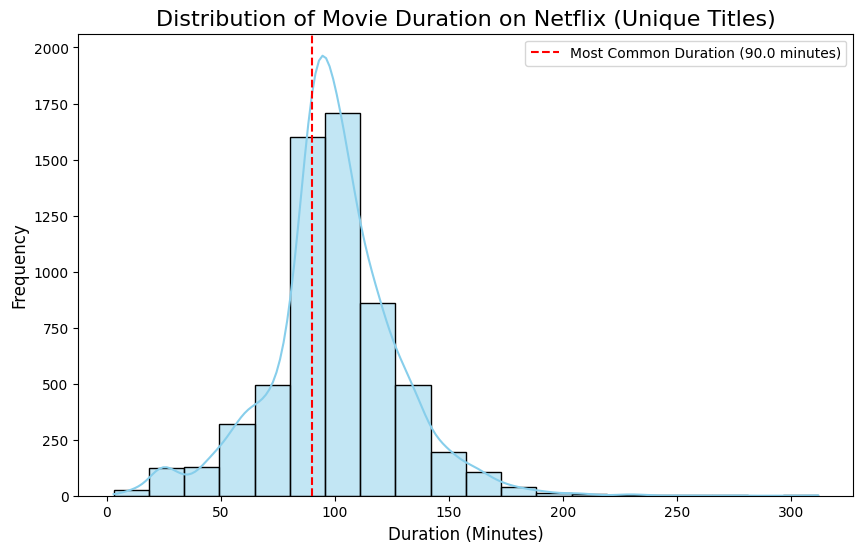

In [52]:
# Filter the data for movies
movies = df[df['type'] == 'Movie']

# Drop duplicates based on 'title' and 'duration_mins'
movies_unique = movies.drop_duplicates(subset=['title', 'duration_mins'])

# Find the most common duration of movies on Netflix
most_common_duration = movies_unique['duration_mins'].value_counts().idxmax()

# Get the original distribution of movie durations after dropping duplicates
duration_counts = movies_unique['duration_mins'].value_counts()

# Distplot for movie duration
plt.figure(figsize=(10, 6))
sns.histplot(movies_unique['duration_mins'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Movie Duration on Netflix (Unique Titles)', fontsize=16)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(x=most_common_duration, color='red', linestyle='--', label=f'Most Common Duration ({most_common_duration} minutes)')
plt.legend()
plt.show()

#### **Insights from Movie Duration Distribution on Netflix**  
- **Most Common Duration**: Movies on Netflix typically run around **90 minutes**.  
- **Distribution Range**: Most movies fall within the **80 to 120-minute** range.  
- **Peak Duration**: A noticeable peak is observed in the **90 to 100-minute** range.  

This indicates that Netflix focuses on standard-length movies, aligning well with viewer preferences. 🕒

#### **4.1.2 What are the trends in Netflix's content production for the top 10 years with the highest number of releases?**

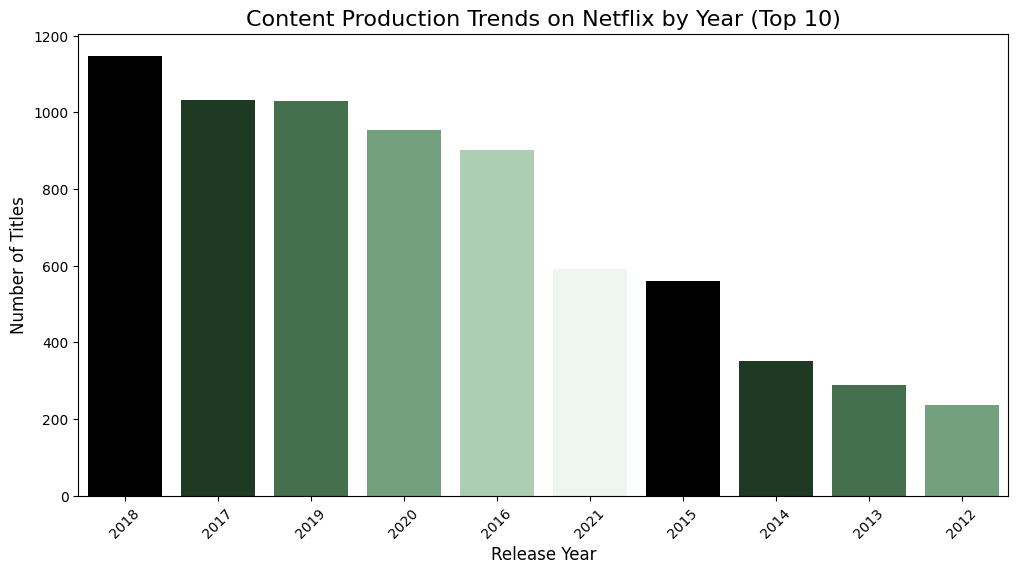

In [53]:
# Drop duplicates based on 'title' and 'release_year' to ensure unique entries
df_cleaned = df.drop_duplicates(subset=['title', 'release_year'])

# Get the top 10 years with the highest number of titles
top_10_years = df_cleaned['release_year'].value_counts().head(10).index

# Filter the data for the top 10 years
df_top_10_years = df_cleaned[df_cleaned['release_year'].isin(top_10_years)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10_years, x='release_year', palette=sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True), order=top_10_years)
plt.title('Content Production Trends on Netflix by Year (Top 10)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### **Insights from the Countplot of Netflix Content Production by Year (Top 10)**

- **Most Active Year**: Netflix released the most content in **2018**.  
- **Top Years for Releases**: High activity in **2017**, **2019**, **2020**, and **2016**.  
- **Growing Trend**: Significant increase in content production from **2012 to 2021**.  

This data indicates that Netflix has been consistently increasing its production of shows and movies, with a peak around 2018. 📈🎬

#### **4.1.3 What is the distribution of the number of seasons for TV shows on Netflix?**

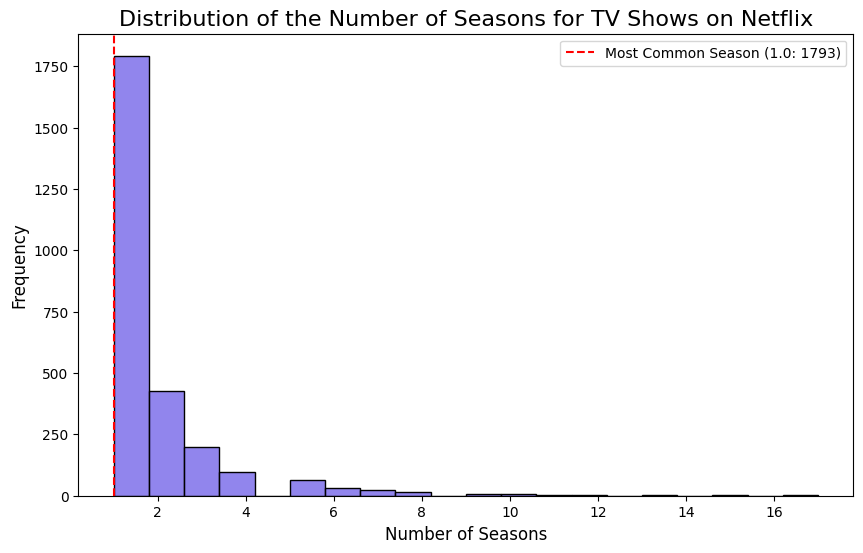

In [54]:
# Filter the data for TV shows and deduplicate
tv_shows = df[df['type'] == 'TV Show'].drop_duplicates(subset=['title', 'type'])

# Create a histogram for the number of seasons
plt.figure(figsize=(10, 6))
sns.histplot(tv_shows['duration_seasons'], kde=False, bins=20, color='#6c5ce7')
plt.title('Distribution of the Number of Seasons for TV Shows on Netflix', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Highlight the most common season
most_common_season = tv_shows['duration_seasons'].value_counts().idxmax()
most_common_count = tv_shows['duration_seasons'].value_counts().max()
plt.axvline(x=most_common_season, color='red', linestyle='--', label=f'Most Common Season ({most_common_season}: {most_common_count})')

plt.legend()
plt.show()

#### **Insights from the Histogram of TV Show Seasons on Netflix**  
- **Most Shows Have One Season**: The majority of TV shows on Netflix have just **one season**, with **1793 shows** marked by the red dashed line.  
- **Few Long-Running Shows**: There are significantly fewer TV shows with multiple seasons.  
- **Distribution Confirmation**: The graph confirms that most shows are short, with a sharp drop in the number of shows as the season count increases.  

This suggests that Netflix often creates **short series** to test viewer interest. 📺📊

#### **4.2 For categorical variable(s)**

#### **4.2.1 Are there differences in content duration between Movies and TV Shows?**

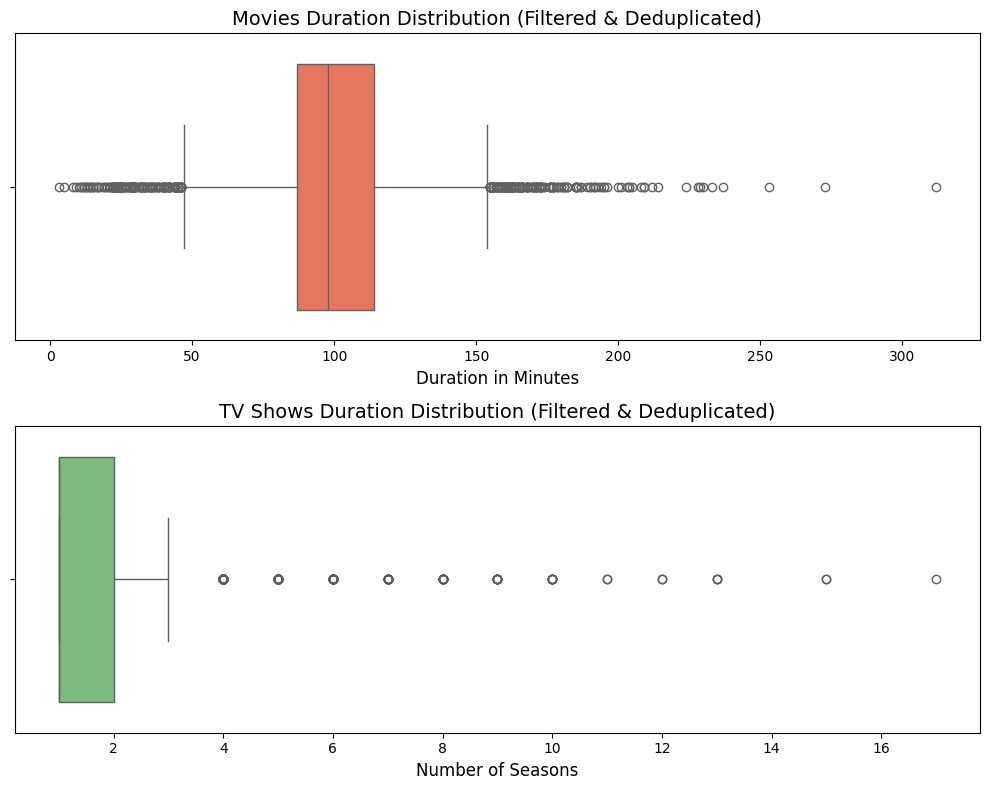

In [55]:
# Drop duplicates after unnesting
df_cleaned = df.drop_duplicates(subset=['title', 'type'])

# Filter data for Movies and TV Shows
movies = df_cleaned[df_cleaned['type'] == 'Movie']
tv_shows = df_cleaned[df_cleaned['type'] == 'TV Show']

# Create subplots for the boxplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Boxplot for Movies (duration in minutes)
sns.boxplot(data=movies, x='duration_mins', ax=ax[0], palette='Reds')
ax[0].set_xlabel('Duration in Minutes', fontsize=12)
ax[0].set_title('Movies Duration Distribution (Filtered & Deduplicated)', fontsize=14)

# Boxplot for TV Shows (duration in seasons)
sns.boxplot(data=tv_shows, x='duration_seasons', ax=ax[1], palette='Greens')
ax[1].set_xlabel('Number of Seasons', fontsize=12)
ax[1].set_title('TV Shows Duration Distribution (Filtered & Deduplicated)', fontsize=14)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

#### **Insights from Boxplots of Movies and TV Shows**

- **Movies**: Most movies on Netflix last between **90 and 120 minutes**, with some outliers reaching up to **300 minutes**.  
- **TV Shows**: Most TV shows have **2 to 3 seasons**, with a few extending up to **16 seasons**.  

These boxplots highlight that movies typically follow a standard feature length, while TV shows often have a limited number of seasons. 🎬📺

#### **4.2.2 What genres are most popular on Netflix?**

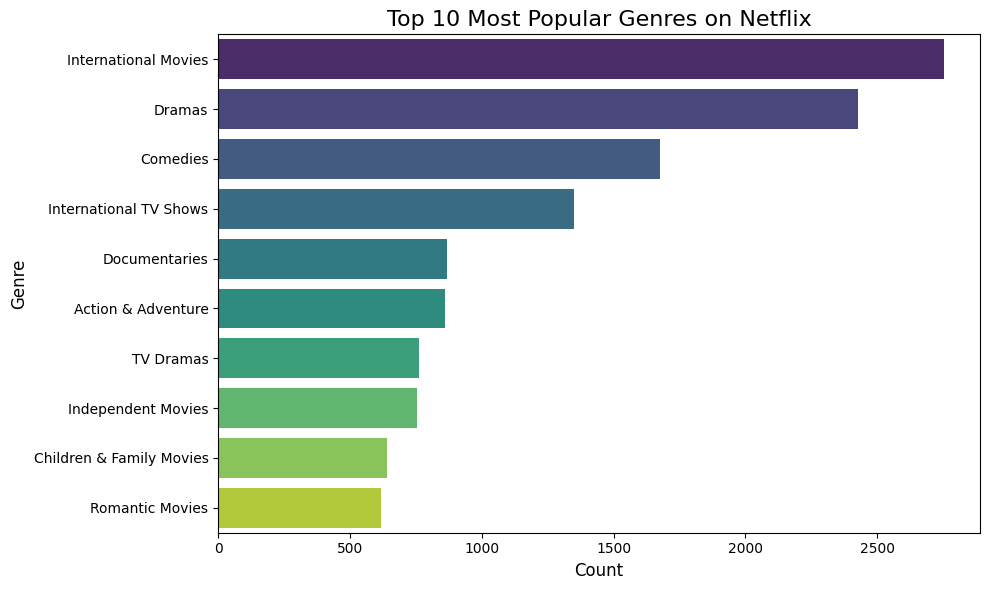

In [56]:
# Barplot for top genres
# Remove duplicates
unique_data = df.drop_duplicates(subset=['show_id', 'listed_in'])

# Normalize genres
genres_split = unique_data['listed_in'].str.split(',', expand=True).stack().str.strip()

# Count occurrences
genre_counts = genres_split.value_counts()

# Slice top 10 genres
top_10_genres = genre_counts.head(10)

# Plot using barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_genres.values,
    y=top_10_genres.index,
    palette="viridis"
)

# Adding labels and title
plt.title('Top 10 Most Popular Genres on Netflix', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### **Insights on Popular Genres on Netflix**  
- **International Movies**: This is the **most popular genre** with the highest number of titles.  
- **Dramas and Comedies**: These genres are also **highly popular**, following International Movies.  
- **Diverse Genres**: There is a strong presence of **International TV Shows**, **Documentaries**, **Action & Adventure**, **TV Dramas**, **Independent Movies**, **Children & Family Movies**, and **Romantic Movies**.  

This highlights a **wide range of popular genres** on Netflix, with International Movies leading the way. 🎥📺🍿

#### **4.2.3 Which countries dominate Netflix's content library?**

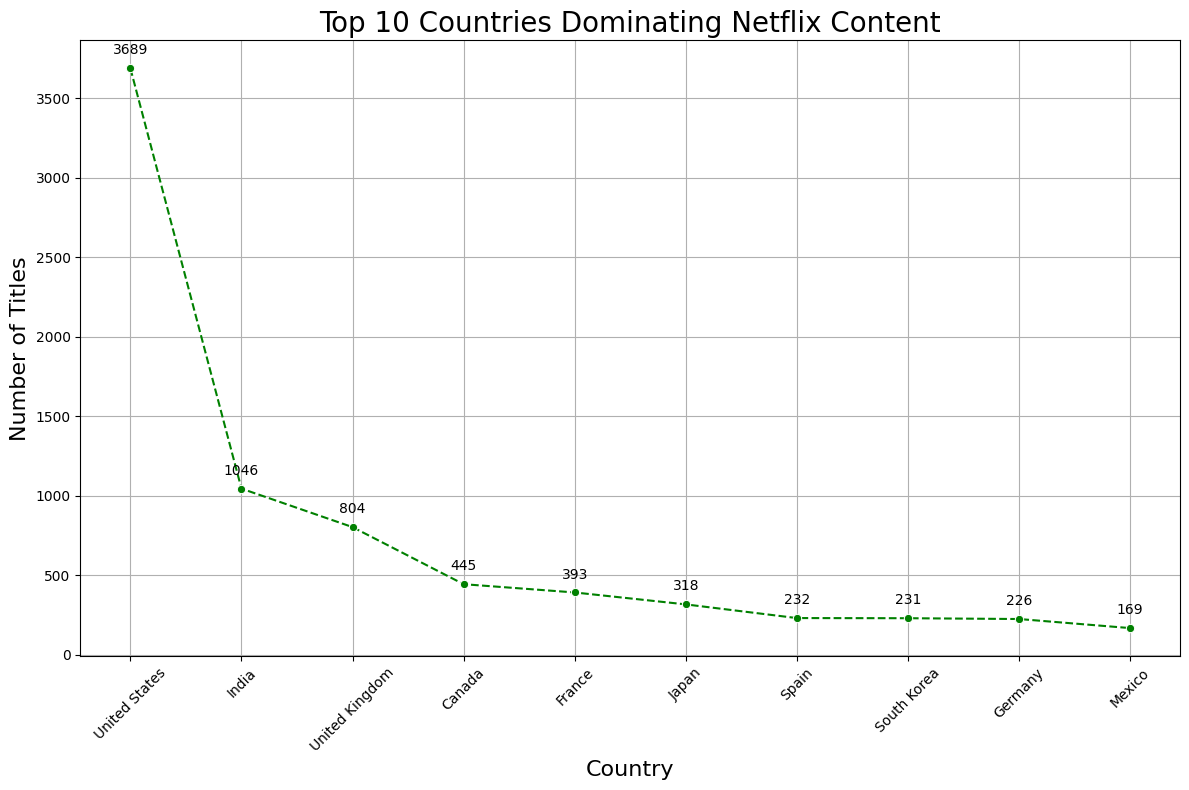

In [57]:
# Filter out rows where 'country' is "Unknown"
filtered_df = df[df["country"] != "Unknown"]

# Drop duplicate based on 'title' and 'country'
unique_df = filtered_df.drop_duplicates(subset=["title", "country"])

# Count unique entries per country
country_counts = unique_df["country"].value_counts()

# Step 4: Slice the top 10 countries (from the count you provided)
top_10_countries = country_counts.nlargest(10)

# Step 5: Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x=top_10_countries.index, y=top_10_countries.values, marker='o', color='green', linestyle='--')
for i, value in enumerate(top_10_countries.values):
    plt.annotate(value, (i, value), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Top 10 Countries Dominating Netflix Content', fontsize=20)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Number of Titles', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Insights from Netflix's Content Library by Country**  
- **United States**: The most titles, with **3,689**.  
- **India**: **1,046** titles, following the US.  
- **United Kingdom**: Holds **804** titles.  
- **Other Countries**: Notable contributions from **Canada (445)**, **France (393)**, **Japan (318)**, **Spain (232)**, **South Korea (231)**, **Germany (226)**, and **Mexico (169)**.  

These insights show that the **United States**, **India**, and the **United Kingdom** have the **largest content libraries** on Netflix. 🌍🎬📈

#### **4.3 Correlation Analysis**

#### **4.3.1 Does the country of production influence the rating of a movie or TV show for the top 10 countries?**

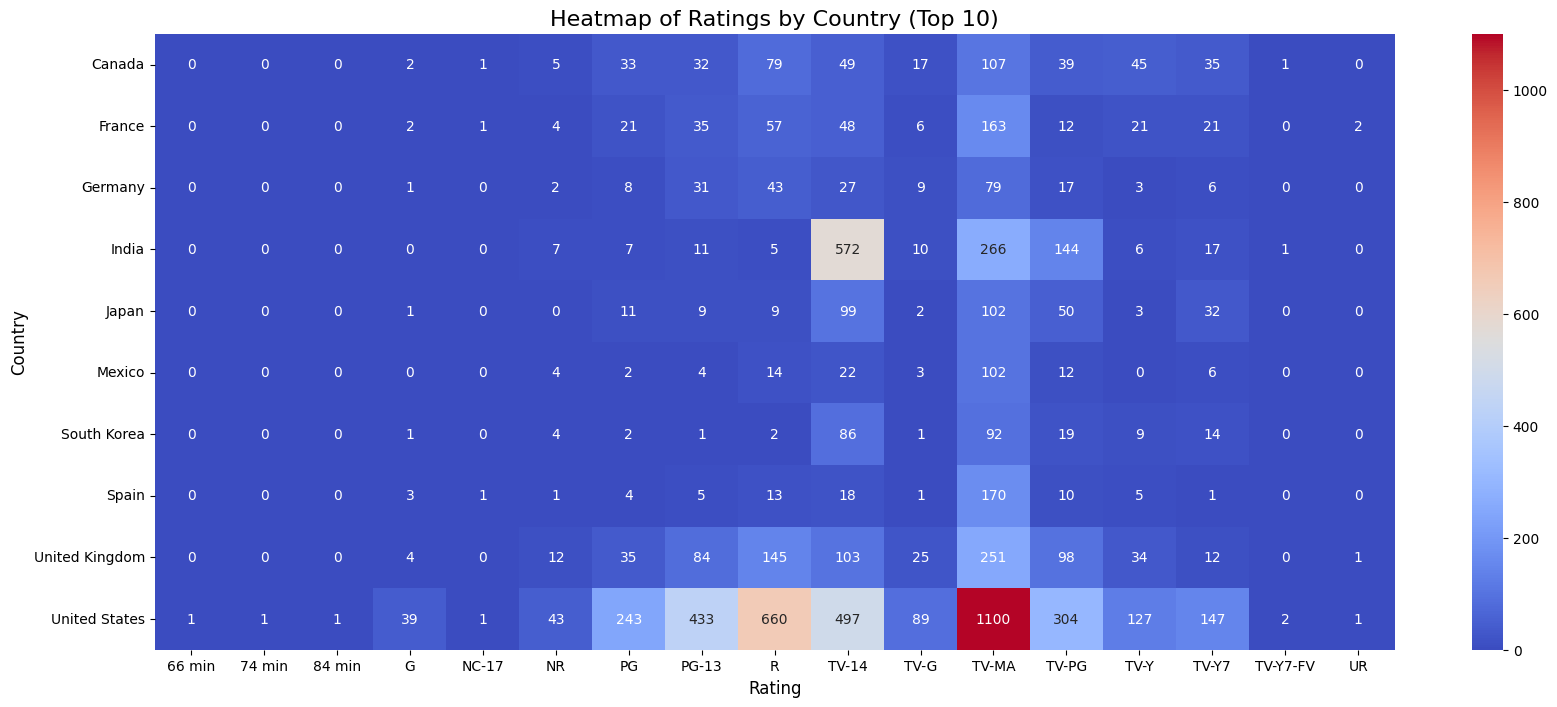

In [58]:
# Filter out rows where 'country' is "Unknown"
filtered_df = df[df["country"] != "Unknown"]

# Drop duplicates based on 'title', 'rating', and 'country'
filtered_df = filtered_df.drop_duplicates(subset=['title', 'rating', 'country'], keep='first')

# Get the top 10 countries by the number of movies/TV shows
top_10_countries = filtered_df['country'].value_counts().head(10).index

# Filter the data to include only the top 10 countries
filtered_df = filtered_df[filtered_df['country'].isin(top_10_countries)]

# Create a contingency table for the top 10 countries and their ratings
country_rating_distribution = pd.crosstab(filtered_df['country'], filtered_df['rating'])

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(country_rating_distribution, cmap='coolwarm', fmt='d', annot=True, cbar=True)
plt.title('Heatmap of Ratings by Country (Top 10)', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

#### **Insights from the Heatmap of Ratings by Country**  

- **United States**: Dominates with the highest variety of content, especially **adult-rated** titles like **TV-MA** (1,100 titles) and **R-rated**.
- **India**: Leans towards **family-friendly** and **teen** content, with a significant number of titles rated **TV-14** (572 titles).
- **European and Asian Markets**: Show strong preferences for **mature** and **diverse** ratings, with notable counts in categories like **TV-MA** and **TV-14**.

This heatmap suggests that the **country of production** influences the **content's rating**, reflecting **regional preferences** and **content regulations**. 📊🌍

#### **4.3.2 Does the number of seasons, release year, and ratings of a TV show correlate with each other in the top 10 countries where Netflix is available?**

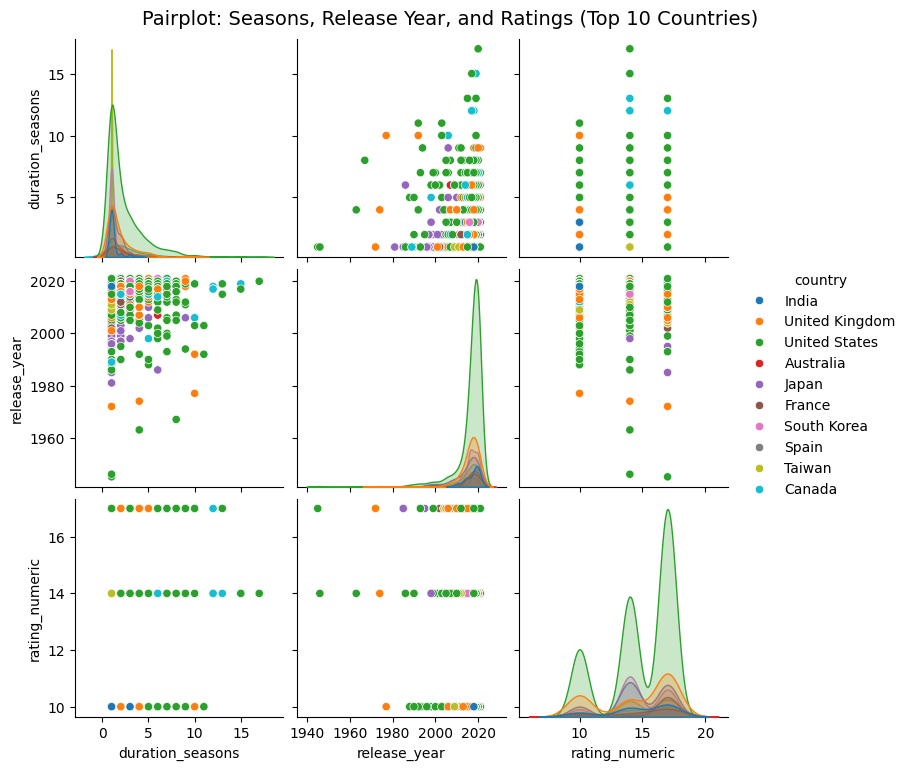

In [59]:
# Handle Missing Values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Extract TV Shows
tv_shows = df[df['type'] == 'TV Show']

# Convert Ratings to Numeric
tv_shows['rating_numeric'] = pd.to_numeric(tv_shows['rating']
    .str.replace('TV-MA', '17')
    .str.replace('TV-14', '14')
    .str.replace('TV-PG', '10'), errors='coerce')

# Filter Out "Unknown" Countries
filtered_df = tv_shows[tv_shows["country"] != "Unknown"]

# Remove Duplicates
filtered_df = filtered_df.drop_duplicates(subset=['title', 'rating', 'country'], keep='first')

# Get Top 10 Countries
top_10_countries = filtered_df['country'].value_counts().head(10).index

# Filter for Top 10 Countries
tv_shows_top_10 = filtered_df[filtered_df['country'].isin(top_10_countries)]

# Create Pairplot
sns.pairplot(
    tv_shows_top_10[['duration_seasons', 'release_year', 'rating_numeric', 'country']],
    diag_kind='kde',
    hue='country'
)
plt.suptitle("Pairplot: Seasons, Release Year, and Ratings (Top 10 Countries)", y=1.02, fontsize=14)
plt.show()

#### **Insights From Pairplot**

- **Seasons**: Most TV shows have fewer than 5 seasons, with a spike at 1 season.  
- **Release Year**: There’s a concentration of releases around 2020.  
- **Country Presence**: The **United States** has a significant presence across all variables.  

These factors don’t strongly correlate with each other, but each plays a significant role in Netflix's content library. 📊🌍

---

## **5. Missing Value & Outlier check**

#### Using df_raw for missing value handling and outlier detection in the 'duration' column

#### **5.1 Identifying Missing Values**

In [60]:
# Count missing values per column
missing_values = df_raw.isnull().sum()
missing_percentage = (df_raw.isnull().sum() / len(df)) * 100

# Combine the results into a single DataFrame for clarity
missing_data_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)

print("Missing Values Summary:")
print(missing_data_df)


Missing Values Summary:
              Missing Values  Percentage (%)
director                2634        1.304018
country                  831        0.411404
cast                     825        0.408434
date_added                10        0.004951
rating                     4        0.001980
duration                   3        0.001485
show_id                    0        0.000000
type                       0        0.000000
title                      0        0.000000
release_year               0        0.000000
listed_in                  0        0.000000
description                0        0.000000


#### **5.2 Visualizing Missing Values**

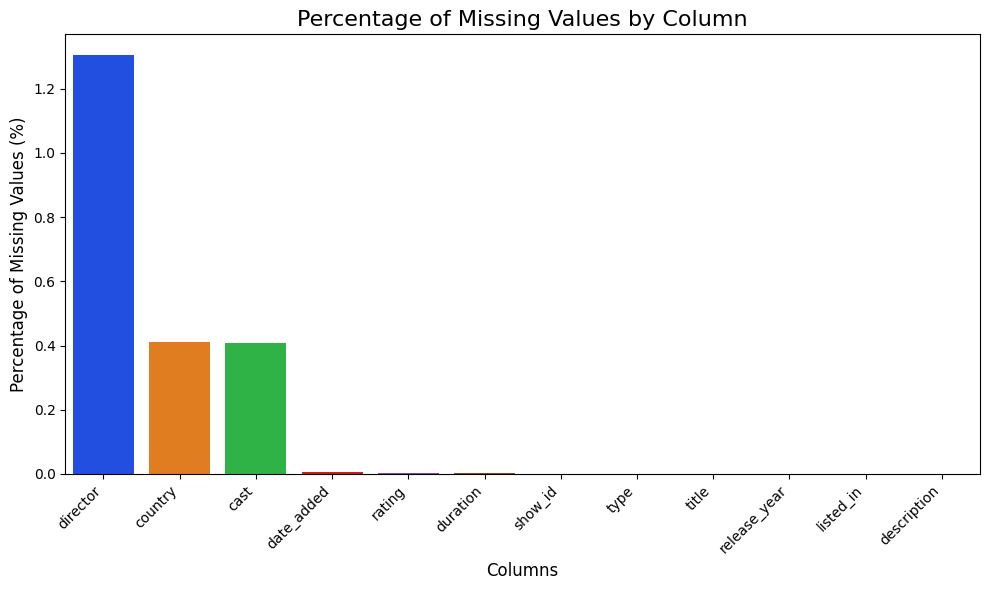

In [61]:
# Set the figure size for the barplot
plt.figure(figsize=(10, 6))

# Create a barplot to visualize the percentage of missing values in each column
sns.barplot(
    x=missing_data_df.index,         # Set the x-axis to column names
    y='Percentage (%)',             # Set the y-axis to percentage of missing values
    data=missing_data_df,           # Use the missing_data_df DataFrame as the data source
    palette='bright'                  # Set the color palette to 'bright' for aesthetics
)

plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.ylabel('Percentage of Missing Values (%)', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

#### **Insights**

- Columns like **director**, **cast**, and **country** have significant missing data, likely due to incomplete metadata.  
- Low percentages of missing data in **date_added** and **rating**.


#### **5.3 Handling Missing Values**
#### Options for Treatment:

#### **Drop rows:** If the missing percentage is low (<10%), we can drop the rows.

In [62]:
df_raw = df_raw.dropna(subset=['date_added', 'rating'])
df_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...


#### **Impute Values**

- **Categorical Columns**: Fill with the most frequent value (**mode**).  
- **Numerical Columns**: Fill with the **mean** or **median**.  

In [63]:
df_raw['director'].fillna('Unknown', inplace=True)
df_raw['cast'].fillna('Unknown', inplace=True)
df_raw['country'] = df_raw['country'].fillna('Unknown')  # Replace missing values with 'Unknown'
df_raw['rating'] = df_raw['rating'].fillna(df_raw['rating'].mode()[0])  # Replace with mode

df_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],Unknown,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...


#### **5.4  Detecting Outliers**

In [64]:
# Function to identify outliers
def detect_outliers(series):
    # Check for missing values
    if series.hasnans:
        series = series.dropna()

    first_quartile = series.quantile(0.25)
    third_quartile = series.quantile(0.75)
    interquartile_range = third_quartile - first_quartile

    lower_bound = first_quartile - 1.5 * interquartile_range
    upper_bound = third_quartile + 1.5 * interquartile_range

    return series[(series < lower_bound) | (series > upper_bound)]

# Separate 'duration' into numeric values for movies and TV shows
df_raw['duration_minutes'] = df_raw['duration'].apply(
    lambda x: int(str(x).split()[0]) if pd.notnull(x) and 'min' in str(x) else None
)
df_raw['duration_seasons'] = df_raw['duration'].apply(
    lambda x: int(str(x).split()[0]) if pd.notnull(x) and 'Season' in str(x) else None
)

# For movies
movie_durations = df_raw[df_raw['type'] == 'Movie']['duration_minutes']

# For TV shows
tv_durations = df_raw[df_raw['type'] == 'TV Show']['duration_seasons']

# Outlier Detection for Movies
outliers_movies = detect_outliers(movie_durations)
print(f"Number of outliers in Movie durations: {len(outliers_movies)}")

# Outlier Detection for TV Shows
outliers_tv = detect_outliers(tv_durations)
print(f"Number of outliers in TV Show durations: {len(outliers_tv)}")

Number of outliers in Movie durations: 449
Number of outliers in TV Show durations: 254


#### **5.5  Visualizing Outliers**

#### Boxplot to Spot Outliers:

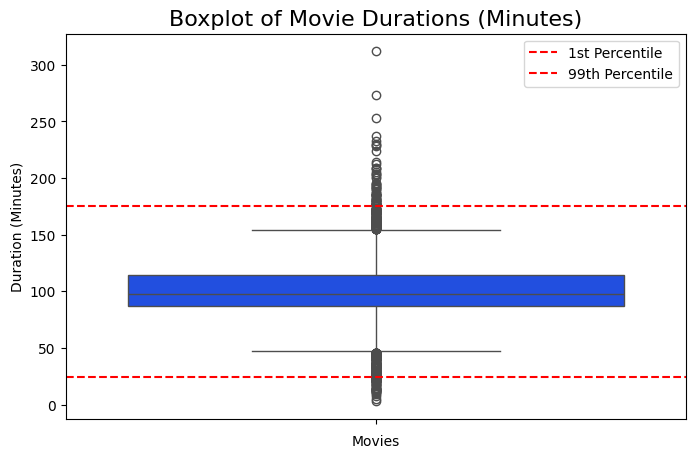

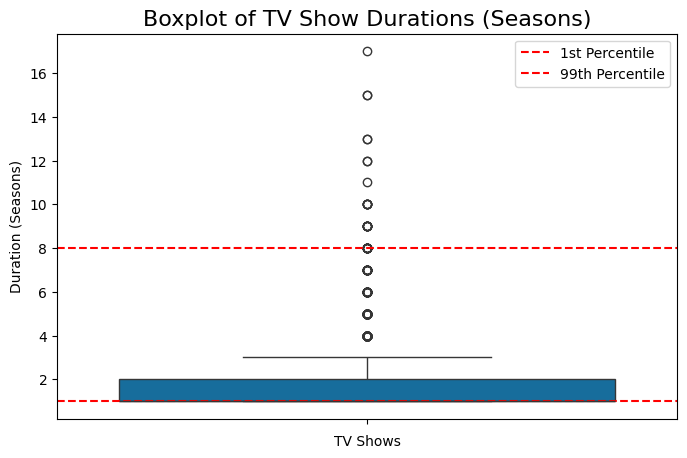

In [65]:
# Boxplot for Movie durations (in minutes)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_raw[df_raw['type'] == 'Movie'], y='duration_minutes', palette='bright')

# Add horizontal lines to represent the 1st and 99th percentiles
percentile_1 = df_raw[df_raw['type'] == 'Movie']['duration_minutes'].quantile(0.01)
percentile_99 = df_raw[df_raw['type'] == 'Movie']['duration_minutes'].quantile(0.99)
plt.axhline(percentile_1, color='red', linestyle='--', label='1st Percentile')
plt.axhline(percentile_99, color='red', linestyle='--', label='99th Percentile')

plt.title('Boxplot of Movie Durations (Minutes)', fontsize=16)
plt.ylabel('Duration (Minutes)')
plt.xlabel('Movies')
plt.legend()
plt.show()

# Boxplot for TV Show durations (in seasons)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_raw[df_raw['type'] == 'TV Show'], y='duration_seasons', palette='colorblind')

# Add horizontal lines to represent the 1st and 99th percentiles
percentile_1 = df_raw[df_raw['type'] == 'TV Show']['duration_seasons'].quantile(0.01)
percentile_99 = df_raw[df_raw['type'] == 'TV Show']['duration_seasons'].quantile(0.99)
plt.axhline(percentile_1, color='red', linestyle='--', label='1st Percentile')
plt.axhline(percentile_99, color='red', linestyle='--', label='99th Percentile')

plt.title('Boxplot of TV Show Durations (Seasons)', fontsize=16)
plt.ylabel('Duration (Seasons)')
plt.xlabel('TV Shows')
plt.legend()
plt.show()

#### **Insights from Boxplot: Spotting Outliers in Movie and TV Show Durations**

**Movies**:
- Most movies have a duration of **80–120 minutes**.  
- Movies exceeding **200 minutes** are considered outliers.  
- The **1st percentile** represents very short movies, while the **99th percentile** highlights exceptionally long ones.

**TV Shows**:
- The typical duration of TV shows is **1–3 seasons**.  
- TV shows running beyond **8 seasons** are outliers.  
- The **1st percentile** marks very short shows, and the **99th percentile** represents long-running shows.

#### Distribution Plot to Confirm Outliers:

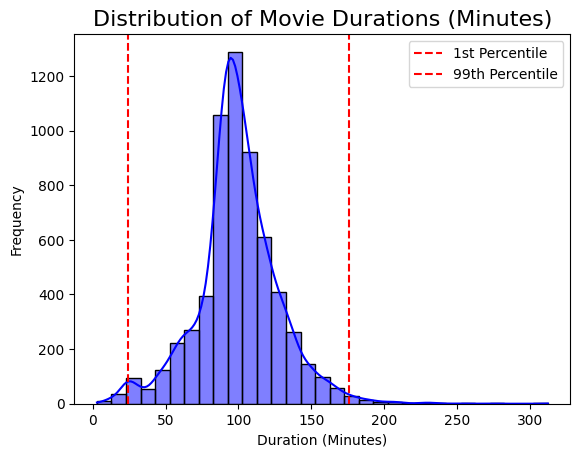

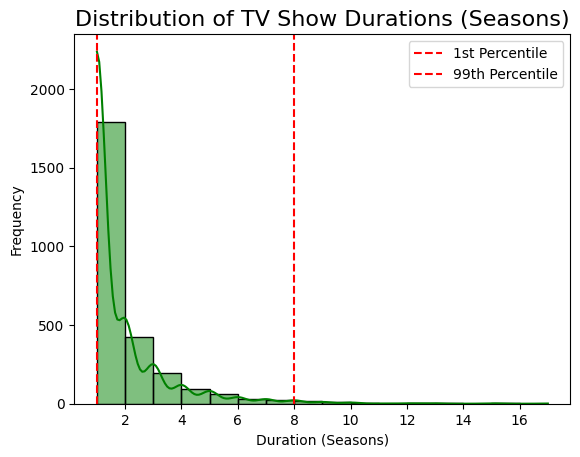

In [66]:
# Distribution plot for Movie durations (in minutes)
movie_durations = df_raw[df_raw['type'] == 'Movie']['duration_minutes'].dropna()
sns.histplot(movie_durations, kde=True, color='blue', binwidth=10)
plt.title('Distribution of Movie Durations (Minutes)', fontsize=16)
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')

# Add vertical lines to represent the 1st and 99th percentiles
percentile_1 = movie_durations.quantile(0.01)
percentile_99 = movie_durations.quantile(0.99)
plt.axvline(percentile_1, color='red', linestyle='--', label='1st Percentile')
plt.axvline(percentile_99, color='red', linestyle='--', label='99th Percentile')
plt.legend()
plt.show()

# Distribution plot for TV Show durations (in seasons)
tv_durations = df_raw[df_raw['type'] == 'TV Show']['duration_seasons'].dropna()
sns.histplot(tv_durations, kde=True, color='green', binwidth=1)
plt.title('Distribution of TV Show Durations (Seasons)', fontsize=16)
plt.xlabel('Duration (Seasons)')
plt.ylabel('Frequency')

# Add vertical lines to represent the 1st and 99th percentiles
percentile_1 = tv_durations.quantile(0.01)
percentile_99 = tv_durations.quantile(0.99)
plt.axvline(percentile_1, color='red', linestyle='--', label='1st Percentile')
plt.axvline(percentile_99, color='red', linestyle='--', label='99th Percentile')
plt.legend()
plt.show()

#### **Insights from Distribution Plot to Confirm Outliers in Movies and TV Shows**

- **Movies (Duration in Minutes)**:
  - Most movies last between **60–200 minutes**.
  - **Very Short**: 1% of movies are around **50 minutes**.
  - **Very Long**: 1% of movies exceed **200 minutes**.

- **TV Shows (Duration in Seasons)**:
  - Most TV shows have between **1–8 seasons**.
  - **Very Short**: 1% of TV shows have only **1 season**.
  - **Very Long**: 1% of TV shows go beyond **8 seasons**.

These insights highlight typical durations while identifying outliers for both movies and TV shows, offering a clear view of Netflix's content trends. 🎥📺


---

## **6. Insights Based on Non-Graphical and Visual Analysis**


*I have provided insights from both non-graphical and visual analysis, covering the range of attributes, variable distribution, and relationships. This summarizes the overall insights from the analysis.*





#### **6.1 Comments on the Range of Attributes**
- **Content Types**:  
  - Two categories: **Movies** and **TV Shows**.  
  - **Movies (6,131)** far outnumber **TV Shows (2,676)**.

- **Release Year**:  
  - Spans **74 years**, with a surge in content production since **2012**.

- **Durations**:  
  - **Movies**: Range from **very short (~50 minutes)** to **extremely long (>200 minutes)**.  
  - **TV Shows**: Predominantly **1–3 seasons**, with outliers beyond **8 seasons**.

- **Ratings**:  
  - Covers **17 unique categories**, with a focus on **TV-MA** and **TV-14**.

- **Countries**:  
  - Diverse content originating from **128 nations**, led by the **US, India**, and the **UK**.




#### **6.2 Comments on Distribution of Variables and Relationships Between Them**

- **Distributions**:  
  - **Movies**:  
    - Typically **80–120 minutes**, peaking around **90 minutes**.  
  - **TV Shows**:  
    - Majority are **single-season**.  
  - **Content by Year**:  
    - Steady growth in releases, peaking in **2018**.

- **Relationships**:  
  - **Country and Ratings**:  
    - **US** has diverse ratings, leaning towards **adult content** (TV-MA).  
    - **India** focuses on **teen-friendly** (TV-14) and **family content**.  
  - **Genres and Content Types**:  
    - **International Movies** dominate **Movies**.  
    - **Short series** dominate **TV Shows**.




#### **6.3 Comments for Each Univariate and Bivariate Plot**

- **Univariate Analysis**:  
  - **Movie Durations**:  
    - Most common range: **90–100 minutes**.  
    - Outliers >200 minutes represent **exceptionally long films**.  
  - **TV Show Seasons**:  
    - Sharp drop after **1 season**, indicating many **experimental short series**.  
  - **Content Production by Year**:  
    - Significant growth post-**2012**, peaking in **2018**, reflects Netflix's **expansion strategy**.  

- **Bivariate Analysis**:  
  - **Genres by Content Type**:  
    - **International Movies** dominate the **Movies** category.  
    - **TV Shows** focus more on **dramas** and **comedies**.  
  - **Ratings by Country**:  
    - **US** leads in **mature content** (TV-MA, R).  
    - **India** leans towards **family** and **teen content** (TV-PG, TV-14).  
  - **Content by Country**:  
    - **US, India**, and **UK** lead production, showing strong **regional trends**.

---

## **7. Business Insights**

**Global Reach:**

- Netflix offers a wide variety of content.
- This shows its strategy to cater to audiences worldwide.

**Content Strategy:**

- Most movies last between 90 and 120 minutes.
- TV shows usually have 1 to 3 seasons.
- This helps Netflix meet viewer preferences and test new ideas.

**Production Trends:**

- Netflix has been increasing its content production since 2012.
- The peak was in 2018, showing strong growth.

**Regional Preferences:**

- Content ratings vary by country.
- The US prefers more adult-rated shows.
- India favors family-friendly and teen content.
- This reflects cultural differences and local regulations.

**Target Audience:**

- Most content is for mature (TV-MA) and teen (TV-14) viewers.
- This likely shows Netflix's focus on its main audience groups.

These insights help understand how Netflix creates and shares its content to match global and local needs. 🌍🎬📈

---

## **8. Recommendations**

**Expand Global Content:**
- Continue to invest in diverse content from various countries to attract and retain a global audience.

**Focus on Short Series:**
- Develop more short TV series to test viewer interest and minimize production risk.

**Produce Standard-Length Movies:**
- Maintain the trend of creating movies that are around 90-120 minutes long, as this aligns well with viewer preferences.

**Increase Family-Friendly Content:**
- Enhance the library of family-friendly and teen-rated content, especially for regions like India where this content is highly preferred.

**Leverage Popular Genres:**
- Focus on producing more content in popular genres such as International Movies, Dramas, and Comedies to meet high viewer demand.

**Boost High-Production Years:**
- Replicate the successful content production strategies from peak years like 2018 to maximize new releases and viewer engagement.

**Adapt Regional Content:**
- Tailor content to suit regional preferences and ratings to comply with local regulations and cultural norms.

**Engage Key Directors and Actors:**
- Collaborate with top-performing directors and actors to attract their fanbase and ensure high-quality content.

**Monitor Viewer Feedback:**
- Regularly collect and analyze viewer feedback to adapt content strategies based on audience preferences and trends.

**Promote Diverse Ratings:**
- Ensure a balanced mix of content ratings to cater to a broad audience, from mature viewers to family-friendly options.

These simple and actionable recommendations can help enhance Netflix's content strategy and continue to grow its global footprint. 🌍🎬📈

---

### *Created by* ***Rishabh Dev Sahu*** ✨